# **Computer Vision Track - Assignment 1**
## **Artificial Neural Network for Image Classification**

In this assignment, we explore the fundamentals of building a neural network for image classification. Image classification is a core task in computer vision, where the goal is to correctly identify and categorize objects in images. We will design and implement a neural network from scratch using popular machine learning libraries, applying key concepts such as activation functions, and backpropagation. By training the model on a labeled dataset, we aim to evaluate its performance and understand how different network architectures influence classification accuracy. This assignment serves as a practical introduction to deep learning in computer vision.

====================================================================================================

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 1**

The code below imports essential libraries for building and training an artificial neural network (ANN) using PyTorch.
1) <blue>**torch**</blue> and <blue>**torch.nn**</blue> provide core functionality for tensors and neural networks.
2) <blue>**optim**</blue> offers optimization algorithms (like <green>**Adam**</green>).
3) <blue>**torchvision**</blue> helps with image-related tasks, and transforms aids in image preprocessing.
4) <blue>**DataLoader**</blue> is used to load datasets in batches.
5) Libraries like <blue>**matplotlib**</blue>, <blue>**seaborn**</blue>, and <blue>**sklearn.metrics**</blue> help visualize results and evaluate the model using metrics such as <green>**accuracy**</green>, <green>**precision**</green>, <green>**recall**</green> etc.

In [3]:
# Import necessary libraries
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision 
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import numpy as np

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 2**
1) The <blue>**device**</blue> variable ensures the model runs on a <green>**GPU**</green> if available; otherwise, it falls back to a <green>**CPU**</green>.
2) The <blue>**transform**</blue> object defines the <green>**preprocessing**</green> steps for images
3) <blue>**ToTensor()**</blue> converts images to tensors.
4) <blue>**Normalize((0.5,), (0.5,))**</blue> normalizes the images to a range between -1 and 1, helping with better convergence during training.

In [4]:
# Set device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(device)

# Define the transformations (Normalization)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize the dataset to range [-1, 1]
])

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 3**
1) This code outlines loading the <blue>**MNIST**</blue> dataset for <green>**handwritten digit recognition**</green>.
2) The <blue>**train_loader**</blue> and <blue>**test_loader**</blue> are used to load the datasets in batches of 64, with shuffling applied only to the training set.
3) The <blue>**dataiter**</blue> and next commands allow viewing a batch of images and labels, which can be useful for visualization before training.


Note: The placeholders **"None"** need to be replaced with the correct dataset-loading code.

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
60000
10000


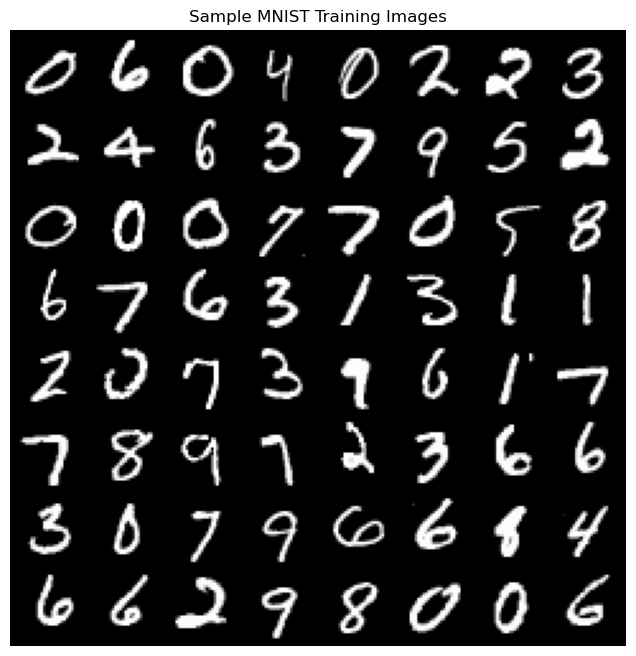

In [5]:
# Load the MNIST dataset
# Download and load the training and test sets using torchvision.datasets
train_dataset = datasets.MNIST(root="D:/Deep Learning Bootcamp/Computer Vision/Week 1/Datasets/train_dataset",
                               train=True, 
                               download=True,
                               transform=transform)
test_dataset = datasets.MNIST(root="D:/Deep Learning Bootcamp/Computer Vision/Week 1/Datasets/test_dataset",
                              train=False,
                              download=True,
                              transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Visualize some images (Optional)
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(train_dataset.classes)
print(len(train_dataset))
print(len(test_dataset))


# Create a grid of images (8x8 = 64 images if batch_size=64)
img_grid = torchvision.utils.make_grid(images[:64], nrow=8, padding=2, normalize=True)

# Convert to numpy for matplotlib
npimg = img_grid.numpy()
plt.figure(figsize=(8,8))
plt.imshow(np.transpose(npimg, (1, 2, 0)))  # convert from (C, H, W) to (H, W, C)
plt.title("Sample MNIST Training Images")
plt.axis("off")
plt.show()

# print(len(train_dataset))
# print(len(test_dataset))

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 4**
1) This code defines a simple <green>**feedforward artificial neural network (ANN)**</green> for classifying MNIST digits.
2) The model has three fully connected layers <blue>**(fc1, fc2, fc3)**</blue>, and the final layer outputs predictions for <green>**10 classes (digits 0–9)**</green>.
3) The <green>**forward pass**</green> describes how the input data flows through the network
4) The input image is first <green>**flattened**</green>.
5) It passes through fully connected layers with <blue>**ReLU activation function**</blue>.

Note: Replace the placeholders **"None"** with the appropriate numbers of units and activation functions in each layer.

In [45]:
# Define the neural network model
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        # TODO: Define the layers (Flatten, Fully Connected, Activation functions)
        self.fc1 = nn.Linear(28*28, 1024)  # Replace None with the correct number of units
        self.fc2 = nn.Linear(1024, 512)   # Replace None with the correct number of units
        self.fc3 = nn.Linear(512, 10)     # Output layer for 10 classes

    def forward(self, x):
        # TODO: Implement the forward pass
        x = x.view(-1, 28*28)  # Flatten the image
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        x = nn.ReLU()(x)
        x = self.fc3(x)
        return x

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 5**
1) The <blue>**ANN model**</blue> is instantiated and moved to the <green>**selected device (CPU or GPU)**</green>.
2) The loss function is set to <blue>**CrossEntropyLoss**</blue>, which is suitable for <green>**multi-class classification**</green> problems like MNIST.
3) The optimizer is <blue>**Adam**</blue>, with a <blue>**learning rate**</blue> of <green>**0.001**</green>, used to adjust the model parameters during training based on gradients computed from the loss.

In [46]:
# Initialize the model, loss function, and optimizer
model = ANN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 6**
This code trains the neural network over a specified number of epochs (num_epochs).
For each batch of images and labels, the following steps are performed:
1) <blue>**Data Movement**</blue>: Images and labels are moved to the <green>**device (CPU or GPU)**</green>.
2) <blue>**Forward Pass**</blue>: Images pass through the network to compute the <green>**output predictions**</green>.
3) <blue>**Loss Calculation**</blue>: The loss between the predictions and true labels is computed and added to <blue>**ls_losses**</blue> for tracking.
4) <blue>**Backpropagation and Optimization**</blue>: Gradients are calculated using backpropagation, and the optimizer <green>**updates the model parameters**</green> based on these gradients.

Every 100 batches, the loss is printed to monitor training progress.

In [47]:
# Training the network
num_epochs = 20 # Choose the appropriate number of epochs
ls_losses = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # TODO: Move images and labels to the device
        images = images.to(device).view(-1, 28*28)  # Move images to device and flatten
        labels = labels.to(device)  # Move labels to device

        # Forward pass
        outputs = model(images)  # Forward pass through the model
        loss = criterion(outputs, labels)  # Compute the loss
        ls_losses.append(loss.detach().cpu().numpy())

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize the weights

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/20], Step [100/469], Loss: 0.4068
Epoch [1/20], Step [200/469], Loss: 0.2779
Epoch [1/20], Step [300/469], Loss: 0.2789
Epoch [1/20], Step [400/469], Loss: 0.1438
Epoch [2/20], Step [100/469], Loss: 0.1645
Epoch [2/20], Step [200/469], Loss: 0.0726
Epoch [2/20], Step [300/469], Loss: 0.0764
Epoch [2/20], Step [400/469], Loss: 0.1144
Epoch [3/20], Step [100/469], Loss: 0.0798
Epoch [3/20], Step [200/469], Loss: 0.2373
Epoch [3/20], Step [300/469], Loss: 0.0990
Epoch [3/20], Step [400/469], Loss: 0.1714
Epoch [4/20], Step [100/469], Loss: 0.0771
Epoch [4/20], Step [200/469], Loss: 0.0761
Epoch [4/20], Step [300/469], Loss: 0.0849
Epoch [4/20], Step [400/469], Loss: 0.0450
Epoch [5/20], Step [100/469], Loss: 0.1192
Epoch [5/20], Step [200/469], Loss: 0.0651
Epoch [5/20], Step [300/469], Loss: 0.0290
Epoch [5/20], Step [400/469], Loss: 0.1352
Epoch [6/20], Step [100/469], Loss: 0.0101
Epoch [6/20], Step [200/469], Loss: 0.0932
Epoch [6/20], Step [300/469], Loss: 0.0468
Epoch [6/20

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 7**
1) This code plots the <blue>**training losses**</blue> that were recorded in <blue>**ls_losses**</blue> during training.
2) The <blue>**x-axis**</blue> represents the <green>**number of samples (batches)**</green> seen during training, and the <blue>**y-axis**</blue> shows the <green>**corresponding loss**</green>.
3) It provides a visual representation of how the <green>**model's loss decreases over time**</green>, indicating whether the training is progressing well.

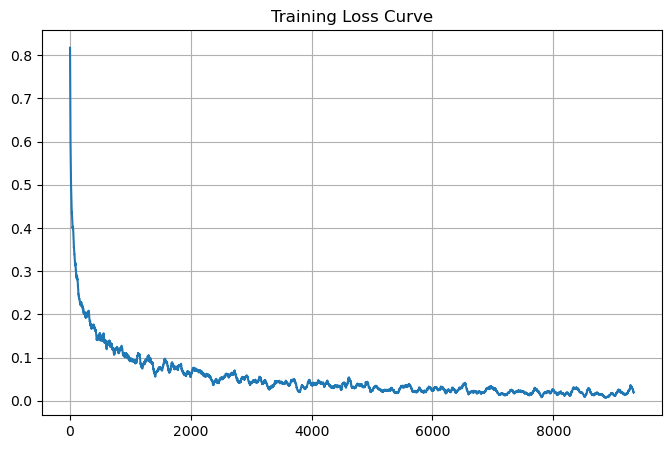

In [48]:
window = 50
smooth_loss = np.convolve(ls_losses, np.ones(window)/window, mode='valid')

plt.figure(figsize=(8,5))
plt.plot(smooth_loss)
plt.title("Training Loss Curve")
plt.xlabel = "Iterations"
plt.ylabel = "Loss"
plt.grid(True)
plt.show()

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 8**
This block evaluates the model on the test dataset.\
<blue>**model.eval()**</blue> sets the model to <green>**evaluation mode**</green>, disabling dropout layers and stopping the computation of gradients to save memory and speed up computations.
For each batch of test images:
1) <blue>**Data Movement**</blue>: Images and labels are moved to the <green>**device (CPU/GPU)**</green>.
2) <blue>**Forward Pass**</blue>: Images pass through the network to compute <green>**predictions**</green>.
3) <blue>**Accuracy Calculation**</blue>: The model's predictions are compared to the true labels, and the <green>**accuracy**</green> is calculated.
4) <blue>**Storing Results**</blue>: Predictions and true labels are saved to <green>**calculate metrics**</green> later.

At the end of testing, the accuracy of the model on the test dataset is printed.

Note: Replace the placeholders **"None"** with the appropriate code for data movement, prediction, and storing results.

In [ ]:
# Testing the model
model.eval()  # Set the model to evaluation mode
all_preds = []
all_labels = []
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device).view(-1, 28*28)  # Move images to device and flatten
        labels = labels.to(device)  # Move labels to device

        outputs = model(images)  # Forward pass through the model
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_preds.extend(predicted.cpu().numpy())  # Append predictions to the list
        all_labels.extend(labels.cpu().numpy())  # Append actual labels to the list

    print(f'Accuracy of the network on the test images: {100 * correct / total}%')

Accuracy of the network on the test images: 97.66%


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 9**
This code calculates key performance metrics to evaluate the model:
1) <blue>**Accuracy**</blue>: Percentage of correctly classified samples.
2) <blue>**Precision**</blue>: Proportion of true positive predictions out of all positive predictions.
3) <blue>**Recall**</blue>: Proportion of true positives out of actual positive samples.
4) <blue>**F1-Score**</blue>: <green>**Harmonic mean**</green> of precision and recall.
5) The <blue>**confusion matrix**</blue> is also calculated, showing the number of correct and incorrect predictions for each class. It is visualized using a <green>**heatmap**</green>, where the <blue>**rows**</blue> represent <green>**true labels**</green>, and the <blue>**columns**</blue> represent <green>**predicted labels**</green>.

Note: Replace the placeholders **"None"** with the appropriate code to calculate the metrics using sklearn and compute the confusion matrix.

Accuracy: 97.66%
Precision: 0.9768
Recall: 0.9766
F1-Score: 0.9766


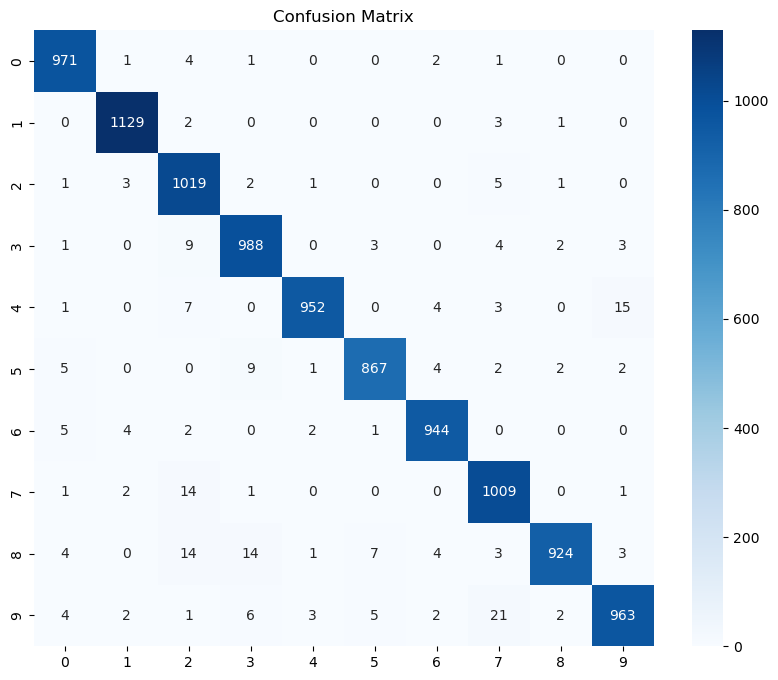

In [ ]:
all_preds = np.array(all_preds)  
all_labels = np.array(all_labels)

# Calculate accuracy, precision, recall, and F1-score

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel = 'True Label'
plt.xlabel = 'Predicted Label'
plt.show()

### **Step 10 (For Advanced Level, optional for Basic Level)**

Hyperparameter tuning is a crucial step in optimizing the performance of a neural network. It involves finding the best set of hyperparameters that control the learning process and the model's architecture, such as the learning rate, batch size, number of epochs, and the number of units in each layer.

Techniques like grid search or random search can be employed to systematically explore different combinations of these hyperparameters and identify the values that yield the best results on a validation set. This process helps in improving the model's accuracy and generalization capabilities.

In [ ]:
# Define hyperparameters to tune
param_grid = {
    'learning_rate': [0.001, 0.005,0.01],
    'batch_size': [32, 64, 128],
    'num_epochs': [10,12, 14, 16, 18, 20]
}

best_accuracy = 0
best_params = {}

# Iterate through hyperparameter combinations
for lr in param_grid['learning_rate']:
    for bs in param_grid['batch_size']:
        for epochs in param_grid['num_epochs']:
            print(f"\nTraining with LR: {lr}, Batch Size: {bs}, Epochs: {epochs}")

            # Re-initialize model, loss, and optimizer
            model = ANN().to(device)
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            # Update DataLoader with new batch size
            train_loader = DataLoader(dataset=train_dataset, batch_size=bs, shuffle=True)
            test_loader = DataLoader(dataset=test_dataset, batch_size=bs, shuffle=False)

            # Training loop
            model.train()
            for epoch in range(epochs):
                running_loss = 0.0
                for images, labels in train_loader:
                    images = images.to(device).view(-1, 28*28)
                    labels = labels.to(device)

                    outputs = model(images)
                    loss = criterion(outputs, labels)

                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                    running_loss += loss.item()

                print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

            # Evaluation loop
            model.eval()
            all_preds = []
            all_labels = []
            with torch.no_grad():
                for images, labels in test_loader:
                    images = images.to(device).view(-1, 28*28)
                    labels = labels.to(device)
                    outputs = model(images)
                    _, predicted = torch.max(outputs, 1)
                    all_preds.extend(predicted.cpu().numpy())
                    all_labels.extend(labels.cpu().numpy())

            accuracy = accuracy_score(all_labels, all_preds) * 100
            print(f'Accuracy for LR={lr}, Batch Size={bs}, Epochs={epochs}: {accuracy:.2f}%')

            # Store best parameters
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'learning_rate': lr, 'batch_size': bs, 'num_epochs': epochs}

print("\nBest Hyperparameters:")
print(best_params)
print(f"Best Accuracy: {best_accuracy:.2f}%")


### **Step 11 (For Advanced Level, optional for Basic Level)**

Regularization is a set of techniques used to prevent overfitting in neural networks. Overfitting occurs when a model learns the training data too well, including the noise and outliers, which negatively impacts its performance on unseen data. Regularization methods add a penalty to the loss function or modify the network architecture to discourage the model from becoming too complex. Common regularization techniques include L1 and L2 regularization, and dropout.

In [31]:
# Add regularization (Dropout) to the ANN model
class ANN_Regularized(nn.Module):
    def __init__(self):
        super(ANN_Regularized, self).__init__()
        self.fc1 = nn.Linear(28*28, 1024)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Initialize the regularized model
model_regularized = ANN_Regularized().to(device)

# Define loss function and optimizer
criterion_regularized = nn.CrossEntropyLoss()
optimizer_regularized = optim.Adam(model_regularized.parameters(), lr=0.001)

print("Regularized ANN model defined with dropout layers.")

Regularized ANN model defined with dropout layers.


In [32]:
import torch
import torch.nn as nn
import numpy as np

# ------------------------------
# EarlyStopping Class
# ------------------------------
class EarlyStopping:
    def __init__(self, patience=3, delta=0.0, path='best_model.pth'):
        """
        Args:
            patience (int): How many epochs to wait after last improvement
            delta (float): Minimum change to qualify as improvement
            path (str): Filepath to save the best model
        """
        self.patience = patience
        self.delta = delta
        self.path = path
        self.best_loss = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(model)
        elif val_loss > self.best_loss - self.delta:
            self.counter += 1
            print(f"EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.save_checkpoint(model)
            self.counter = 0

    def save_checkpoint(self, model):
        torch.save(model.state_dict(), self.path)
        print(f"Model improved — saved to {self.path}")

### Regularized model with dropout layer and early stopping

In [33]:
# ----------------------------------
# Training + Validation Loop
# ----------------------------------
num_epochs = 20
ls_losses = []

early_stopping = EarlyStopping(patience=3, path='best_model.pth')

for epoch in range(num_epochs):
    # -------------------- TRAINING --------------------
    model_regularized.train()   # Enable dropout
    running_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device).view(-1, 28*28)
        labels = labels.to(device)

        outputs = model_regularized(images)
        loss = criterion_regularized(outputs, labels)
        ls_losses.append(loss.detach().cpu().numpy())

        optimizer_regularized.zero_grad()
        loss.backward()
        optimizer_regularized.step()

        running_loss += loss.item()

        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], "
                  f"Loss: {loss.item():.4f}")

    # Average training loss for this epoch
    train_loss = running_loss / len(train_loader)

    # -------------------- VALIDATION --------------------
    model_regularized.eval()  # Disable dropout, batchnorm updates
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # No gradient computation for validation
        for images, labels in test_loader:
            images = images.to(device).view(-1, 28*28)
            labels = labels.to(device)

            outputs = model_regularized(images)
            loss = criterion_regularized(outputs, labels)
            test_loss += loss.item()

            # Compute accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss /= len(test_loader)
    test_acc = 100 * correct / total

    print(f"\nEpoch [{epoch+1}/{num_epochs}] Summary:")
    print(f"   Training Loss: {train_loss:.4f}")
    print(f"   Test Loss: {test_loss:.4f}")
    print(f"   Test Accuracy: {test_acc:.2f}%\n")

    # -------------------- EARLY STOPPING --------------------
    early_stopping(test_loss, model_regularized)

    if early_stopping.early_stop:
        print(" Early stopping triggered — training stopped.")
        break


# ----------------------------------
# Load the Best Saved Model
# ----------------------------------
model_regularized.load_state_dict(torch.load('best_model.pth', weights_only=True))
model_regularized.eval()
print("Loaded the best model (based on test loss).")


Epoch [1/20], Step [100/469], Loss: 0.3307
Epoch [1/20], Step [200/469], Loss: 0.3558
Epoch [1/20], Step [300/469], Loss: 0.1899
Epoch [1/20], Step [400/469], Loss: 0.2065

Epoch [1/20] Summary:
   Training Loss: 0.3238
   Test Loss: 0.1345
   Test Accuracy: 95.84%

Model improved — saved to best_model.pth
Epoch [2/20], Step [100/469], Loss: 0.1830
Epoch [2/20], Step [200/469], Loss: 0.1439
Epoch [2/20], Step [300/469], Loss: 0.1438
Epoch [2/20], Step [400/469], Loss: 0.2805

Epoch [2/20] Summary:
   Training Loss: 0.1574
   Test Loss: 0.1337
   Test Accuracy: 95.57%

Model improved — saved to best_model.pth
Epoch [3/20], Step [100/469], Loss: 0.0670
Epoch [3/20], Step [200/469], Loss: 0.2300
Epoch [3/20], Step [300/469], Loss: 0.1073
Epoch [3/20], Step [400/469], Loss: 0.1458

Epoch [3/20] Summary:
   Training Loss: 0.1271
   Test Loss: 0.0937
   Test Accuracy: 97.20%

Model improved — saved to best_model.pth
Epoch [4/20], Step [100/469], Loss: 0.1102
Epoch [4/20], Step [200/469], Los

In [37]:
model_reg = ANN_Regularized().to(device)
state_dict = torch.load('best_model.pth', weights_only=True)
model_reg.load_state_dict(state_dict)

<All keys matched successfully>

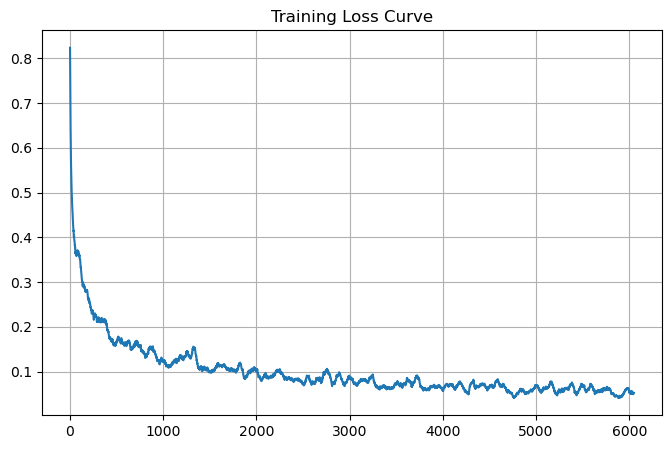

In [38]:
window = 50
smooth_loss = np.convolve(ls_losses, np.ones(window)/window, mode='valid')

plt.figure(figsize=(8,5))
plt.plot(smooth_loss)
plt.title("Training Loss Curve")
plt.xlabel = "Iterations"
plt.ylabel = "Loss"
plt.grid(True)
plt.show()

In [ ]:
# Testing the model
model_reg.eval()  # Set the model to evaluation mode
all_preds = []
all_labels = []
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device).view(-1, 28*28)  # Move images to device and flatten
        labels = labels.to(device)  # Move labels to device

        outputs = model_reg(images)  # Forward pass through the model
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_preds.extend(predicted.cpu().numpy())  # Append predictions to the list
        all_labels.extend(labels.cpu().numpy())  # Append actual labels to the list

    print(f'Accuracy of the Regularized network on the test images: {100 * correct / total}%')

Accuracy of the Regularized network on the test images: 97.96%


Accuracy: 97.96%
Precision: 0.9797
Recall: 0.9796
F1-Score: 0.9796


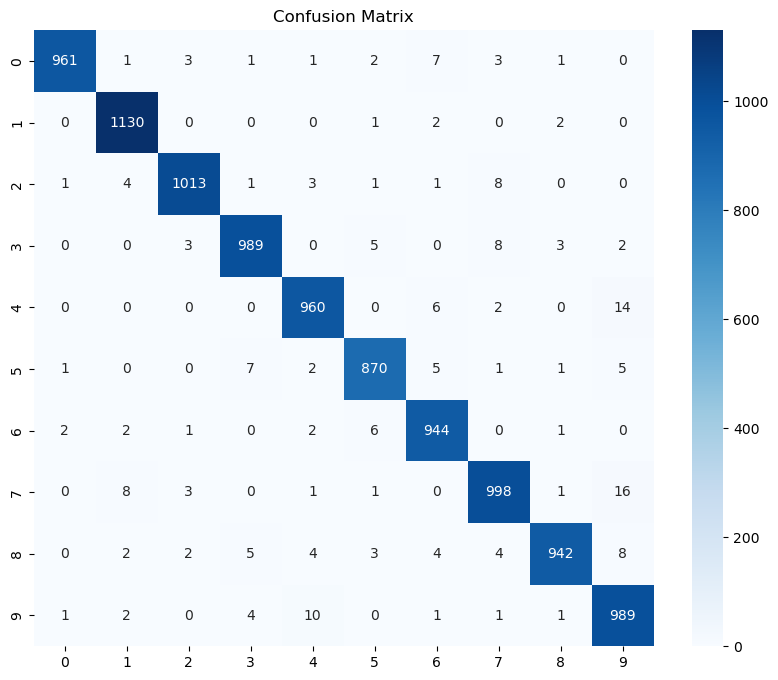

In [ ]:
all_preds = np.array(all_preds)  
all_labels = np.array(all_labels)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# TODO: Confusion matrix calculation
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel = 'True Label'
plt.xlabel = 'Predicted Label'
plt.show()